In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
# In[5]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:
# In[6]:

# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif

In [105]:
# In[8]:


# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):    
    print(feature)
    
# The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


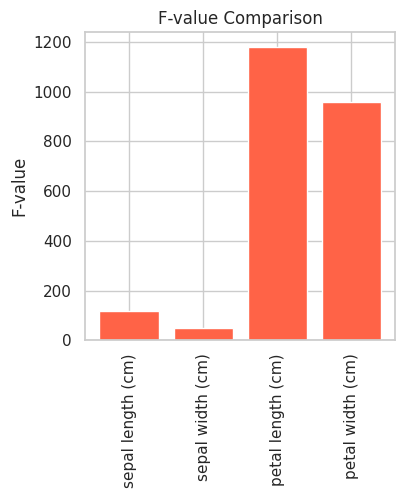

In [106]:
# In[9]:


# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

In [107]:
# In[10]:


# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

In [108]:
# In[11]:


# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)


('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


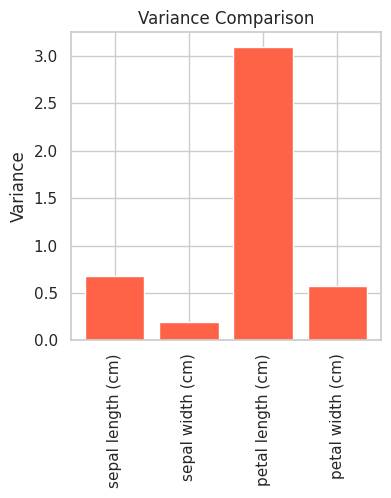

In [109]:
# In[12]:


# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [110]:
# In[15]:

# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
X_data_new = selector.fit_transform(X_data)

# Print the results
print('Number of features before variance thresholding: {}'.format(X_data.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))


Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


In [111]:
# In[16]:


#Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

In [112]:
# In[17]:


# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)


('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


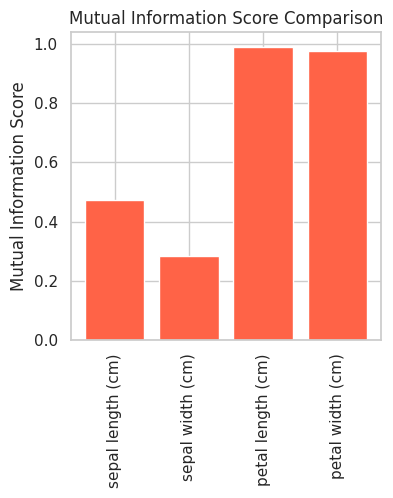

In [113]:
# In[18]:


# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()


In [114]:
# In[19]:

# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

In [115]:
# In[20]:


# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

In [116]:
# In[21]:


# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))


Number of features before feature selection: 4
Number of features after feature selection: 2


In [117]:
# In[22]:


# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])


- petal length (cm)
- petal width (cm)


In [118]:
# In[24]:

# Import ExhaustiveFeatureSelector from Mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [119]:
# In[25]:


# Import logistic regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

In [120]:
# In[26]:


# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=4,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)


Features: 15/15

In [121]:
# In[27]:


# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [122]:
# In[29]:

#We can transform the dataset into a new dataset containing 
# only the subset of features that generates the best score by using transform method.

In [123]:
# In[30]:


# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))


# """  There is no difference between the dataset after and before the transformation
# because the subset that yields the best score include all of the features.
# 
# We can see the performance of each subset of features by calling get_metric_dict."""

Number of features before transformation: 4
Number of features after transformation: 4


In [124]:
# In[32]:

# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


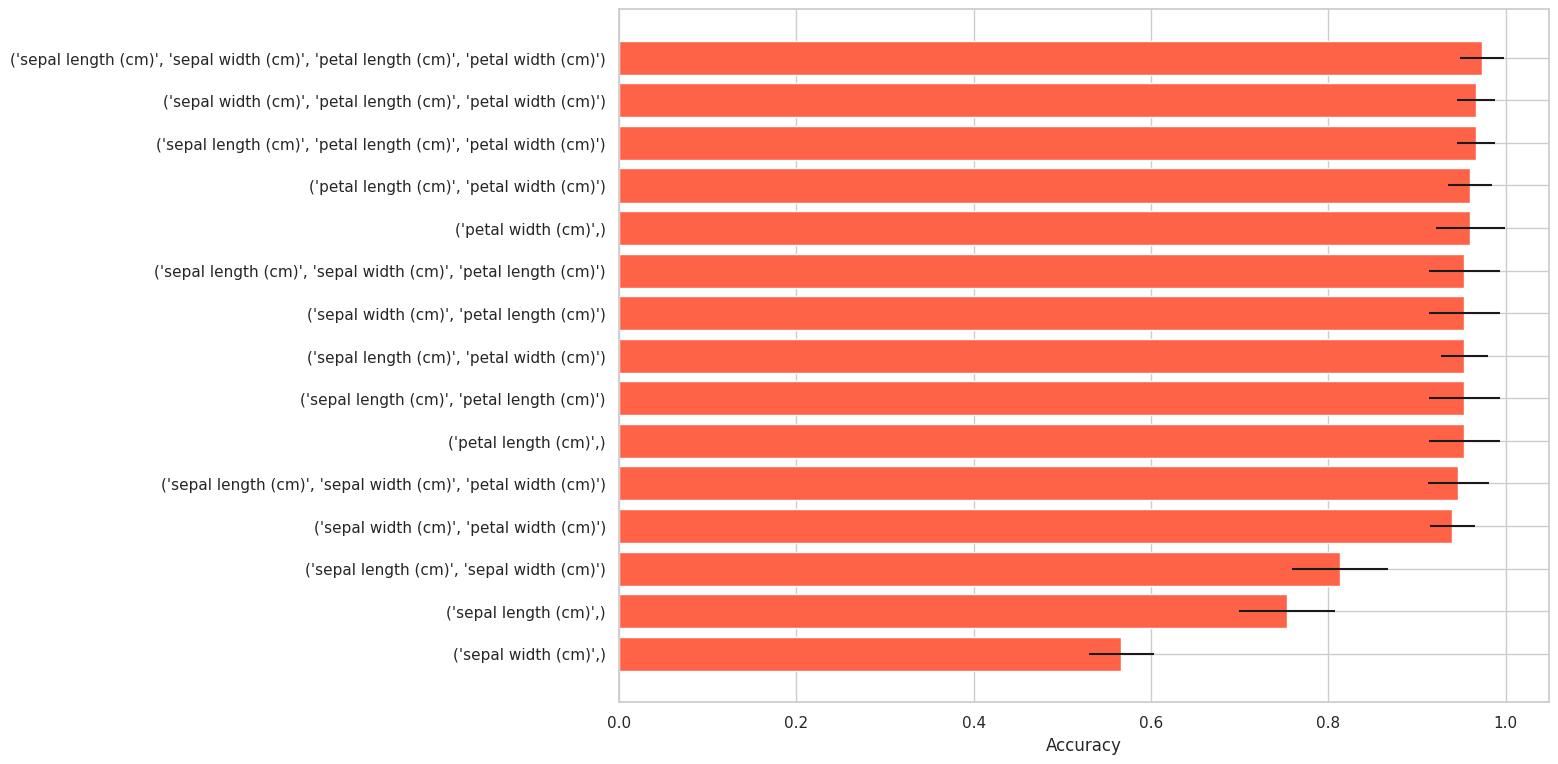

In [125]:
# In[33]:

# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, 
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()


In [126]:
# In[34]:


# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [127]:
# In[35]:

# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# that yield the best score


In [128]:

# In[36]:


# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [129]:
# In[37]:


# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))


# #There is no difference between the dataset after and before the transformation 
#  #because the subset that yields the best score include all of the features.

Number of features before transformation: 4
Number of features after transformation: 4


In [130]:
# In[38]:


# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."


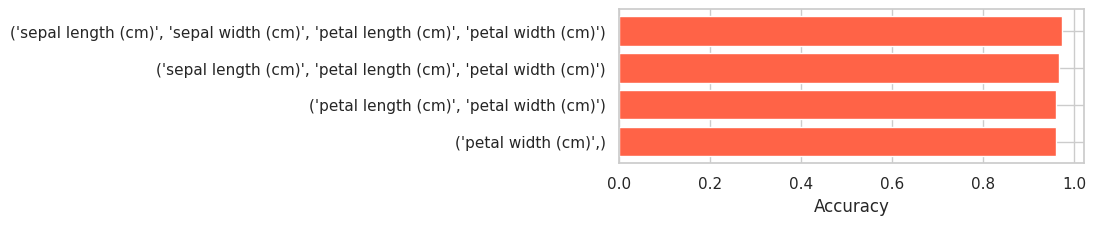

In [131]:
# In[52]:


# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [132]:
# In[53]:


# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5


In [133]:
# In[54]:


# Train SFS with our dataset
sbs = sbs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [134]:
# In[55]:


# Transform the dataset
X_data_new = sbs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 4


In [135]:
# In[56]:

# Show the performance of each subset of features considered by SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"


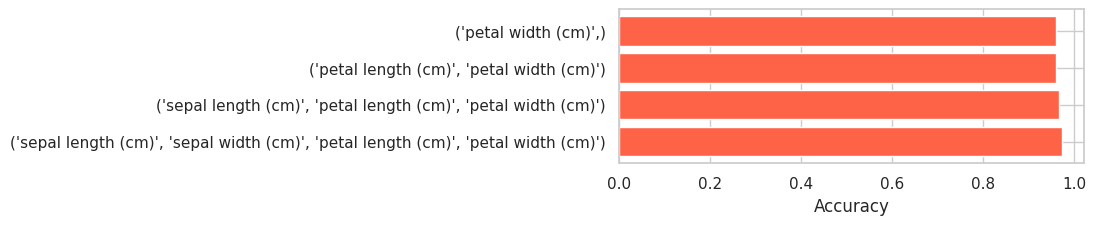

In [136]:
# In[57]:

# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, 
        sbs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [137]:
# In[58]:

# Compare the selection generated by EFS, SFS, and SBS
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

Best subset by EFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SFS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SBS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
